<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#双边指数衰减随机数产生器" data-toc-modified-id="双边指数衰减随机数产生器-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>双边指数衰减随机数产生器</a></span></li><li><span><a href="#Metropolis-Hasting方法产生高斯分布" data-toc-modified-id="Metropolis-Hasting方法产生高斯分布-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Metropolis-Hasting方法产生高斯分布</a></span></li></ul></div>

# 双边指数衰减随机数产生器

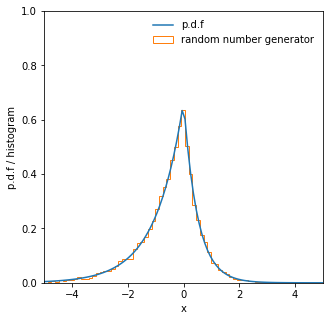

In [83]:
def double_side_exp_pdf(x, x0 = 0, k1 = 1, k2 =1): # no normalization
    k = np.where(x < x0, k1, k2)
    return 1/(1/k1+1/k2)*np.exp(-k*np.abs(x-x0))

# k exp(-k x)
def exp_rand(n, x0 = 0, k1 = 1, k2 = 1):
    
    sig = np.random.rand(n) - 1/k1/(1./k1+1./k2)
    k = np.where(sig < 0, k1, k2)

    c = np.random.rand(n)
    x = 1/k*np.log(1 - c)    
    x = np.copysign(x, sig)
    
    x = x + x0
    return x

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5, 5))
plt.xlim((-5,5))
plt.ylim((0, 1))
plt.plot(np.linspace(-5,5,100), double_side_exp_pdf(np.linspace(-5,5,100), k1=1, k2=2), label="p.d.f")
plt.hist(exp_rand(10000, k1=1, k2=2), histtype='step', bins=100, density=True, label="random number generator")
plt.xlabel("x")
plt.ylabel("p.d.f / histogram")
plt.legend(frameon=False)
plt.show()


# Metropolis-Hasting方法产生高斯分布

$p(x) = {\rm gauss}(x)$

$ q(x, x^\prime) = \text{ double_side_exp_pdf}(x^\prime, x0=x, k1=1, k2=2)$

$ q(x, x^\prime)/ q(x^\prime, x) \neq 1$

gauss(0,x0=1)/gauss(0,x0=1) 2.718281828459045


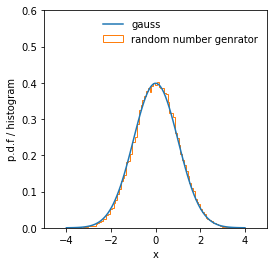

In [97]:
import numpy as np
import matplotlib.pyplot as plt

def gauss(x):
    return 1/np.sqrt(2*np.pi) * np.exp(- x*x / 2)


def MH_gauss():
    N=100000
    X=0;
    #rand = 0.2*(np.random.rand(N)-0.5)
    rand = exp_rand(N, k1=1,k2=2)
    c = np.random.rand(N)
    Xs=np.zeros(N)
    for i in range(N):
        Xp = X + rand[i]
        
        alpha = gauss(Xp) * double_side_exp_pdf(X, x0=Xp, k1=1,k2=2) / (gauss(X)*double_side_exp_pdf(Xp, x0=X, k1=1,k2=2))
        #acc = gauss(Xp) / (gauss(X))

        if c[i] < alpha:
            X = Xp
        Xs[i] = X
    return Xs
    
    
print("gauss(0,x0=1)/gauss(0,x0=1)", double_side_exp_pdf(0,1,k1=1,k2=2)/double_side_exp_pdf(1,0,k1=1,k2=2))

import matplotlib.pyplot as plt
%matplotlib inline    
plt.figure(figsize=(4,4))
plt.xlim((-5,5))
plt.ylim((0, 0.6))
plt.plot(np.linspace(-4,4,100), gauss(np.linspace(-4,4,100)), label="gauss")
plt.hist(MH_gauss(), histtype='step', bins=100, density=True, label="random number genrator")
plt.xlabel("x")
plt.ylabel("p.d.f / histogram")
plt.legend(frameon=False)
plt.show()
